In [1]:
import numpy as np
import matplotlib.pylab as plt

from helpers import load_dict
from plotting_helpers import add_gridlines, get_new_cmap, highlight_k_points
from visualize_correlations import get_k_mesh, calculate_tri_kspace_correlations

import sys
sys.path.append('..')
from interactions import buildlattice_alltoall_primitive_vector 

In [2]:
from scipy.optimize import curve_fit

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 15,
    "font.family": "Helvetica"
})

column_width = 3.75
square_fig_size=(2*column_width,3/2*column_width)
bigger_font_size=22


# Helper Functions

In [4]:
def second_order(x, m1, m2, M_inf_sq):
    return M_inf_sq + m1 * x + m2 * x**2

# Load Data

In [5]:
Ls = np.arange(6,37,6)
all_scales = [0.25,0.5,1.,2.,4.0]
scales = [1.,2.,4.]
rates = [0.475,0.25,0.158]
rates = [0.158,0.25,0.475]
Ts = [0.25,1.00]
mss = ['Square', 'Triangular']

In [6]:
plotting_data = load_dict('./plotting_data/final_correlations_data_plotting.pkl')

# Plot

In [7]:
rate_markers={0.158:'*',0.25:'H',0.475:'^'}
rate_lines={0.158:':',0.25:'--',0.475:'-'}
rate_alphas={0.475:0.2,0.25:0.5,0.158:0.9}
rate_markersize={0.158:9,0.25:7,0.475:7}

colorscale_sq = plt.get_cmap('plasma')
colorscale_tri = plt.get_cmap('viridis')
shades = np.linspace(0.,0.9,2*len(scales))[::-2]
colors_sq = colorscale_sq(shades)
colors_tri = colorscale_tri(shades)
scale_shades = {'Square':{1.0:colors_sq[-3],2.0:colors_sq[-2],4.0:colors_sq[-1]},
                'Triangular':{1.0:colors_tri[-3],2.0:colors_tri[-2],4.0:colors_tri[-1]}}

### ALL


Rate=0.158 --------------------------------------------------

Second-order Fit, scale=1.0
M from <SS>:   0.20123459276674796

Second-order Fit, scale=1.0
M from <C(L/2,L/2)>:   0.20999997864446598


/Users/megan/miniconda3/envs/HeisenbergRNN/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',



Rate=0.158 --------------------------------------------------

Second-order Fit, scale=2.0
M from <SS>:   0.19190722145109368

Second-order Fit, scale=2.0
M from <C(L/2,L/2)>:   0.2010046333152445

Rate=0.158 --------------------------------------------------

Second-order Fit, scale=4.0
M from <SS>:   0.19204839466225757

Second-order Fit, scale=4.0
M from <C(L/2,L/2)>:   0.1982390175773863


/Users/megan/miniconda3/envs/HeisenbergRNN/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


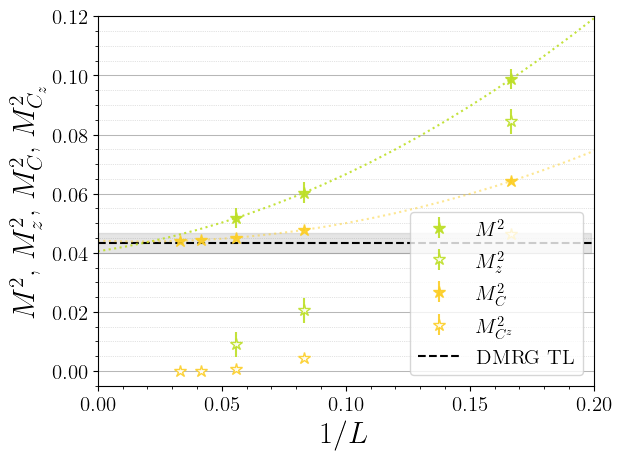

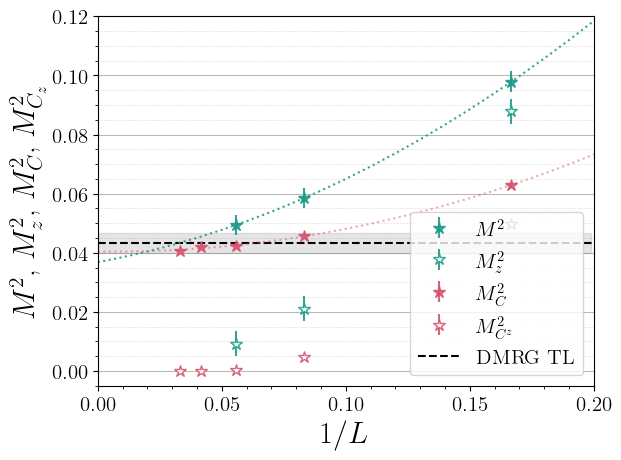

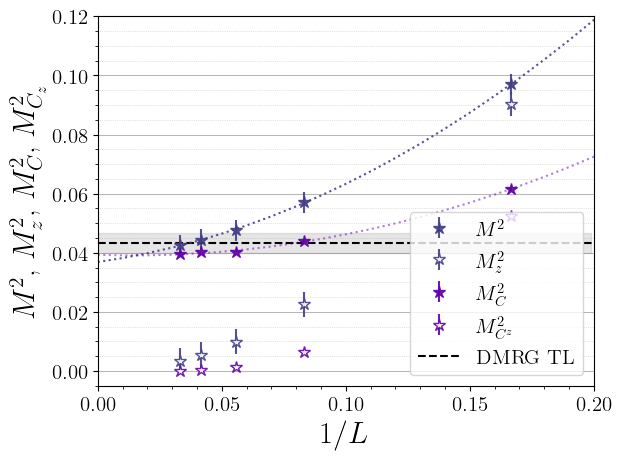

In [8]:
show_C = True
save_all = True

rates = [0.158]#,0.25,0.475]

## periodic bc runs
for scale_ in scales:
    fig, ax = plt.subplots()
    add_gridlines(axes='y')

    for rate_ in rates:
        print(f"\nRate={rate_}","--"*25)
        bc_ = 'periodic'
        ms_ = 'Triangular'
        T_ = 1.0
        T_ = "{:.2f}".format(T_)

        peri_corrs_ls = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['ls']
        peri_corrs = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['Sk from SiSj']/peri_corrs_ls**2
        peri_corrs_errs = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['err Sk from SiSj']
        peri_zcorrs = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['Sk from SziSzj']/peri_corrs_ls**2
        peri_zcorrs_errs = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['err Sk from SziSzj']

        Sk_x = 1/peri_corrs_ls
        if len(peri_corrs_ls)>2:
                params, covariance = curve_fit(second_order, Sk_x, peri_corrs)
                x_mesh = np.arange(0,2*max(Sk_x),0.01)
                ax.plot(x_mesh,second_order(x_mesh,params[0],params[1],params[2]),
                        color=scale_shades[ms_][scale_],alpha=rate_alphas[rate_],linestyle=rate_lines[rate_])
                print(f"\nSecond-order Fit, scale={scale_}\nM from <SS>:   {np.sqrt(params[-1])}")

        ax.errorbar(Sk_x,peri_corrs,yerr=peri_corrs_errs,fmt='o',
                        marker=rate_markers[rate_],alpha=rate_alphas[rate_],markersize=rate_markersize[rate_],
                        color=scale_shades[ms_][scale_],label=f'$M^2$')  
        ax.errorbar(Sk_x,peri_zcorrs,yerr=peri_zcorrs_errs,mfc='white',fmt='o',
                        marker=rate_markers[rate_],alpha=rate_alphas[rate_],markersize=rate_markersize[rate_],
                        color=scale_shades[ms_][scale_],label=f'$M_z^2$')  
        
        if show_C:
                peri_corrs_ls = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['C ls']
                peri_corrs = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['C(L/2,L/2)']/2
                peri_corrs_errs = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['err C(L/2,L/2)']
                peri_zcorrs = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['Cz(L/2,L/2)']/2
                peri_zcorrs_errs = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['err Cz(L/2,L/2)']

                c_x = 1/peri_corrs_ls
                if len(peri_corrs_ls)>2:
                        params, covariance = curve_fit(second_order, c_x, peri_corrs)
                        x_mesh = np.arange(0,2*max(c_x),0.01)
                        ax.plot(x_mesh,second_order(x_mesh,params[0],params[1],params[2]),
                                color=scale_shades['Square'][scale_],alpha=0.5,linestyle=rate_lines[rate_])
                        print(f"\nSecond-order Fit, scale={scale_}\nM from <C(L/2,L/2)>:   {np.sqrt(params[-1])}")

        ax.errorbar(c_x,peri_corrs,yerr=peri_corrs_errs,fmt='o',
                        marker=rate_markers[rate_],alpha=rate_alphas[rate_],markersize=rate_markersize[rate_],
                        color=scale_shades['Square'][scale_],label=f'$M^2_C$')  
        ax.errorbar(c_x,peri_zcorrs,yerr=peri_zcorrs_errs,mfc='white',fmt='o',
                        marker=rate_markers[rate_],alpha=rate_alphas[rate_],markersize=rate_markersize[rate_],
                        color=scale_shades['Square'][scale_],label=r'$M_{C^z}^2$')  
                
    ax.hlines(0.208**2,0,0.2,color='k',alpha=1,linestyle='--',label='DMRG TL')
    ax.fill_between(np.arange(0,0.2,0.001),(0.208-0.008)**2,(0.208+0.008)**2,color='grey',alpha=0.2)

    ax.set_xlabel(r'$1/L$',fontsize=bigger_font_size)
    ax.set_ylabel(r'$M^2$, $M^2_z$, $M_C^2$, $M_{C_z}^2$',fontsize=bigger_font_size)
    ax.set_xlim(0,.2)
    ax.set_ylim(-0.005,.12)
    handles, labels = ax.get_legend_handles_labels()
    order = np.roll(np.arange(len(handles)),shift=4)
    if len(rates)==1:
        ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], ncol=len(rates), loc='lower right')
    else:
        ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], ncol=len(rates), loc='center',bbox_to_anchor=(0.5,-0.4))

    if save_all:
        filename = f'M_scaling_peri_scale{scale_}'
        plt.savefig('./presentation/'+filename+'.png',bbox_inches='tight',pad_inches=0.1)

if not save_all:
        filename = f'M_scaling_peri'
        plt.savefig('./final_figures/'+filename+'.pdf',bbox_inches='tight',pad_inches=0.1)

plt.show()

# Bootstrapping

In [9]:

bc_ = 'periodic'
ms_ = 'Triangular'
T_ = 1.0
T_ = "{:.2f}".format(T_)

scale=4.0
rate=0.158


### Bootstrappint $M^2$

6 -----------
3.491833487001088
0.0035670009860980308
12 -----------
8.219863807425968
0.0034667063031993965
18 -----------
15.42046838005751
0.003476750093612983
24 -----------
25.61386691920785
0.0034845138467762644
30 -----------
38.306291314169336
0.0034909322691540293


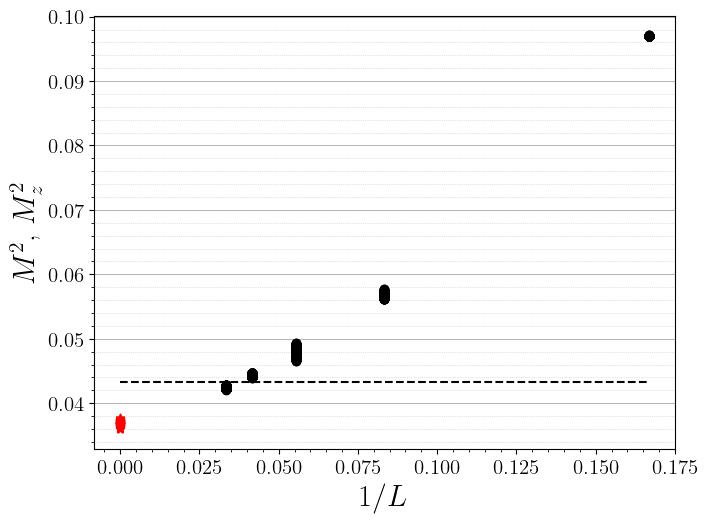

--------------------------------------------------
Getting y-int
--------------------------------------------------
y-int before:        0.03688258589235024
M_\infty before:     0.19204839466225757
y-int BOOTSTRAP:     0.03688298913765631  +/- 3.447196672467606e-06
M_\infty BOOTSTRAP:  0.19204944451275122  +/- 0.0018566627783384913


In [10]:
np.random.seed(100)
Nb = 10000

Sk_ls = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale},rate={rate},T={T_}']['ls']
Sk_x = 1/Sk_ls

# Print finite-size values of Sk
Sk_from_SiSj = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['Sk from SiSj']/Sk_ls**2
errors_Sk_from_SiSj = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['err Sk from SiSj']
for l_i,l in enumerate(Sk_ls):
    print(l,"-----------")
    print(Sk_from_SiSj[l_i] * l**2)
    print(errors_Sk_from_SiSj[l_i])

fig, ax = plt.subplots(figsize=square_fig_size)
add_gridlines(axes='y')

# Reproduce fit
params_Sk, covariance = curve_fit(second_order, Sk_x, Sk_from_SiSj)

# Get residuals
xs = np.reshape(np.tile(Sk_x, Nb),(Nb,-1))
predicted_ys = second_order(Sk_x,params_Sk[0],params_Sk[1],params_Sk[2])
residuals = Sk_from_SiSj - predicted_ys

# Get resampled y values
gaussian_vars = np.random.normal(loc=0.0,scale=1.0,size=(Nb,len(predicted_ys)))
resampled_ys = predicted_ys + residuals * gaussian_vars
ax.scatter(xs, resampled_ys, color='k')

# Perform fits through resampled data
intercepts = []
for b in range(Nb):
    x = xs[b, :]
    y = resampled_ys[b, :]
    paramsb, _ = curve_fit(second_order, x, y)
    intercepts.append(paramsb[-1])
    if b % 100 == 0:
        ax.scatter(0,paramsb[-1],marker='*',color='red')

intercepts = np.array(intercepts)

ax.hlines(0.208**2,0,max(x),color='k',alpha=1,linestyle='--',label='TN')
ax.set_ylabel(r'$M^2$, $M^2_z$',fontsize=bigger_font_size)
ax.set_xlabel(f'$1/L$',fontsize=bigger_font_size)
plt.show()

print("-" * 50)
print("Getting y-int")
print("-" * 50)
print("y-int before:       ", params_Sk[-1])
print("M_\infty before:    ", np.sqrt(params_Sk[-1]))
print("y-int BOOTSTRAP:    ", np.mean(intercepts)," +/-", np.std(intercepts)/np.sqrt(Nb))
print("M_\infty BOOTSTRAP: ", np.sqrt(np.mean(intercepts))," +/-", np.sqrt(np.std(intercepts)/np.sqrt(Nb)))




The bootstrap isn't valid because all residuals are zero because I am fitting a second order fit to three data points.... so definitely need more data points

### Bootstrapping $M_C^2$

6 -----------
0.0615754031511541
0.0006015108501032866
12 -----------
0.04388482799029184
0.00030770176037977224
18 -----------
0.04041919026737976
0.00020678902360625524
24 -----------
0.040117149113613984
0.00015824781285023333
30 -----------
0.03942042270016003
0.00012582536042145192


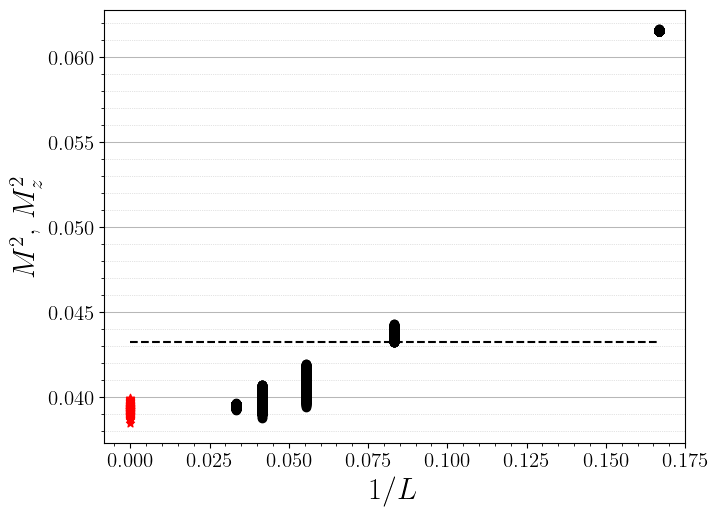

--------------------------------------------------
Getting y-int
--------------------------------------------------
--- second order ---
y-int before (second order):           0.03929870809004728
$M_\infty$ before (second order):      0.1982390175773863
y-int BOOTSTRAP (second order):        0.03929664656570071  +/-  3.158626036404141e-06
$M_\infty$ BOOTSTRAP:                  0.19823381791637046  +/-  0.0017772523839916887


In [11]:
np.random.seed(100)
Nb = 10000

C_ls = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale},rate={rate},T={T_}']['C ls']
C_x = 1/C_ls

# Print finite-size values of C
C = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['C(L/2,L/2)']/2
errors_C = plotting_data[f'{ms_}MS,{bc_}BC'][f'scale={scale_},rate={rate_},T={T_}']['err C(L/2,L/2)']
for l_i,l in enumerate(C_ls):
    print(l,"-----------")
    print(C[l_i])
    print(errors_C[l_i])

fig, ax = plt.subplots(figsize=square_fig_size)
add_gridlines(axes='y')

# Reproduce fit
params_C, covariance = curve_fit(second_order, c_x, C)

# Get residuals
xs = np.reshape(np.tile(C_x, Nb),(Nb,-1))
predicted_ys_second_order = second_order(C_x,params_C[0],params_C[1],params_C[2])
residuals_second_order = C - predicted_ys_second_order
# predicted_ys_linear = reg_C.coef_*C_x + reg_C.intercept_
# residuals_linear = C - predicted_ys_linear

# Get resampled y values
gaussian_vars = np.random.normal(loc=0.0,scale=1.0,size=np.shape(xs))
resampled_ys_second_order = predicted_ys_second_order + residuals_second_order * gaussian_vars
ax.scatter(xs, resampled_ys_second_order, color='k')
# resampled_ys_linear = predicted_ys_linear + residuals_linear * gaussian_vars
# ax.scatter(xs, resampled_ys_linear, color='k',alpha=0.5)

# Perform fits through resampled data
intercepts_second_order = []
intercepts_linear = []
for b in range(Nb):
    x = xs[b, :]
    y_second_order = resampled_ys_second_order[b, :]
    paramsb, _ = curve_fit(second_order, x, y_second_order)
    intercepts_second_order.append(paramsb[-1])
    x = x[:,np.newaxis]
    # y_linear = resampled_ys_linear[b,:]
    # regb = LinearRegression().fit(x,y_linear)
    # intercepts_linear.append(regb.intercept_)
    if b % 100 == 0:
        ax.scatter(0,paramsb[-1],marker='*',color='red')
        # ax.scatter(0,regb.intercept_,marker='*',color='red',alpha=0.5)

intercepts_second_order = np.array(intercepts_second_order)
intercepts_linear = np.array(intercepts_linear)

ax.hlines(0.208**2,0,max(x),color='k',alpha=1,linestyle='--',label='TN')
# ax.set_ylim(-0.681, -0.666)  # Optionally zoom into a region
ax.set_ylabel(r'$M^2$, $M^2_z$',fontsize=bigger_font_size)
ax.set_xlabel(f'$1/L$',fontsize=bigger_font_size)
plt.show()

print("-" * 50)
print("Getting y-int")
print("-" * 50)
print("--- second order ---")
print("y-int before (second order):          ", params_C[-1])
print(r"$M_\infty$ before (second order):     ", np.sqrt(params_C[-1]))
print("y-int BOOTSTRAP (second order):       ", np.mean(intercepts_second_order), " +/- ", np.std(intercepts_second_order)/np.sqrt(Nb))
print(r"$M_\infty$ BOOTSTRAP:                 ", np.sqrt(np.mean(intercepts_second_order)), " +/- ", np.sqrt(np.std(intercepts_second_order)/np.sqrt(Nb)))
# print("--- linear ---")
# print("y-int before (linear):       ", reg_C.intercept_)
# print(r"$M_\infty$ before (linear):  ", np.sqrt(reg_C.intercept_))
# print("y-int BOOTSTRAP (linear):    ", np.mean(intercepts_linear), " +/- ", np.std(intercepts_linear)/np.sqrt(Nb))
# print(r"$M_\infty$ BOOTSTRAP:        ", np.sqrt(np.mean(intercepts_linear)), " +/- ", np.sqrt(np.std(intercepts_linear)/np.sqrt(Nb)))
